### importing libraries

In [1]:
print(" importing libraries ... ")

import numpy as np
import matplotlib.pyplot as plt 
import obspy 


from andbro__save_to import __save_to


 importing libraries ... 


### configurations

In [2]:
##________________________________________________________
print(" initializing general settings ... ")

plt.style.use('default') # print(plt.style.available)   

%matplotlib inline

 initializing general settings ... 


### setting variables

In [3]:
##________________________________________________________
print(" setting variables ... ")

#ipath = '/home/brotzer/'
#ifile = ''

opath = '/home/brotzer/Desktop/'
ofile = 'test.txt'


#tstart = obspy.UTCDateTime("2020-10-19 20:30")
tstart = obspy.UTCDateTime("2019-05-14 13:30")

tdelta = 15 # minutes


tdelta *= 60


 setting variables ... 


### defining methods

In [4]:

def __archive_request(seed_id, tstart, tdelta, raw=None):
    
    ''' get data of ROMY for one component from archive 

    VARIABLES:
        seed_id:    code of seismic stations (e.g. "BW.ROMY..BJU")
        tstart:	    begin of time period
        tdelta:     temporal length of period

    DEPENDENCIES:
        import obspy

    EXAMPLE:
        >>> __get_stream_data_archive('BW.ROMY.10.BJZ', '2020-07-17 02:50', 3600, raw=False)

    '''
    from obspy.clients.fdsn import Client

    print(" requesting data from archive...")

    net, sta, loc, cha = seed_id.split(".")
    
    ## defining parameters
    year = tstart.year
    doy  = tstart.julday
    tend = tstart + tdelta
    
    ## define station depending if raw is set or not
#     sta = sta if raw is None else f"D{sta}"

    ## define local data path
    pathroot = "/import/freenas-ffb-01-data/romy_archive/"

    ## __________________________________________________________________________
    
    try:
        route = obspy.clients.fdsn.RoutingClient("eida-routing")
        inv   = client.get_stations(network=net, station=sta, level="response")
        print("  --> inventory was obtained"); obtained_inventory=True

    except:
        print("  --> inventory could not be obtained..."); obtained_inventory=False
    
    ## -------------------------- ##
    if raw is None:
        ## recreate file structure of archive
        path = f"{pathroot}{year}/{net}/{sta}/{cha}.D/"
        name = f"{net}.{sta}.{loc}.{cha}.D.{year}.{doy}"
        ## get stream data
        st = obspy.read(path+name, starttime=tstart, endtime= tend)
        
        if obtained_inventory:
            print("  --> trend and response is being removed...")
            return st.detrend("linear").remove_response(inventory=inv) 
        else:
            return st   

    ## -------------------------- ##
    elif raw is True: 
        if sta == "ROMY":
            ## recreate file structure of archive
            path = f"{pathroot}{year}/{net}/DROMY/FJ{cha[2]}.D/"
            name = f"{net}.D{sta}..F{cha[1:3]}.D.{year}.{doy}"
            ## get stream data
            st = obspy.read(path+name, starttime=tstart, endtime= tend)
            return st
        else:
            print("  --> something went wrong! perhaps with seed_id?")


In [5]:

def __makeplot_raw_data(bjz, bjz2, bjz3):

    fig, axes = plt.subplots(4,1, figsize=(10, 6))

    fig.subplots_adjust( hspace=0.8)

    dt=bjz[0].stats.delta

    cut1=15000
    cut2=cut1+150
    axes[0].plot(bjz[0].times()[cut1:cut2]*1000, bjz[0][cut1:cut2], color="black")
    axes[0].scatter(bjz[0].times()[cut1:cut2]*1000, bjz[0][cut1:cut2], color="red", zorder=3, s=8)


    axes[1].plot(bjz[0].times()/60, bjz[0], color="black")
    axes[1].plot([dt*cut1, dt*cut1], [min(bjz[0].data), max(bjz[0].data)], color="darkred")
    axes[1].plot([dt*cut2, dt*cut2], [min(bjz[0].data), max(bjz[0].data)], color="red")


    axes[2].plot(bjz2[0].times()/60, bjz2[0], color="black")


    axes[3].plot(bjz3[0].times()/60, bjz3[0], color="black")



    font=12
    axes[0].set_ylabel("counts", fontsize=font)
    axes[1].set_ylabel("counts", fontsize=font)
    axes[2].set_ylabel("rotation rate \n rad/s", fontsize=font)
    axes[3].set_ylabel("rotation rate \n rad/s", fontsize=font)
    axes[0].set_xlabel("Time (ms)", fontsize=font)
    axes[3].set_xlabel("Time (min)", fontsize=font)

    axes[2].set_ylim([-5.3e-8, 5.3e-8])
    axes[3].set_ylim([-1e-9, 1e-9])




    plt.show();
    return fig


### getting data

In [6]:
      
bjz = __archive_request("BW.ROMY.10.BJZ", tstart, tdelta, raw=True)

bjz2 = __archive_request("BW.ROMY.10.BJZ", tstart, tdelta, raw=None)

bjz3=bjz2.copy()


 requesting data from archive...
  --> inventory could not be obtained...
 requesting data from archive...
  --> inventory could not be obtained...


### processing

In [7]:

bjz3.detrend('simple')

bjz3.filter('bandpass', freqmin=.001, freqmax=0.1, corners=2, zerophase=True)


1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2019-05-14T13:30:00.010599Z - 2019-05-14T13:45:00.010599Z | 20.0 Hz, 18001 samples

1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2019-05-14T13:30:00.010599Z - 2019-05-14T13:45:00.010599Z | 20.0 Hz, 18001 samples

### plotting

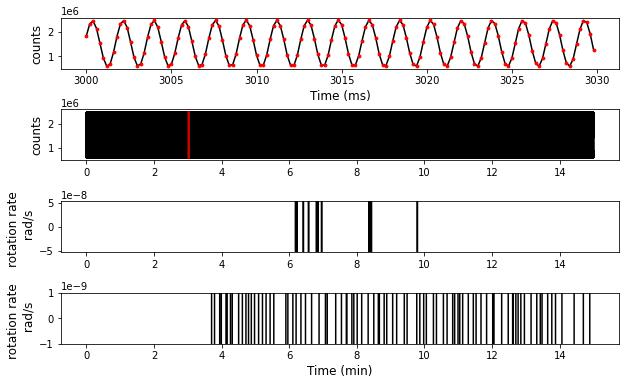

In [8]:
fig = __makeplot_raw_data(bjz, bjz2, bjz3)

### saving

In [ ]:
from andbro__save_to import __save_to

__save_to(fig)